In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

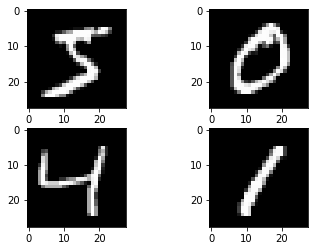

In [3]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [6]:
#one hot encoding
m_train = y_train.shape[0]
m_test = y_test.shape[0]

Y_train = np.zeros((m_train,10))
Y_test = np.zeros((m_test,10))
for i in range(m_train):
    Y_train[i,y_train[i]] = 1
for i in range(m_test):
    Y_test[i,y_test[i]] = 1

In [7]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[10,:])
print(Y_test[2,:])

(60000, 10)
(10000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
# final converted shapes
print("X_train :",X_train.shape)
print("Y_train :",Y_train.shape)
print("X_test :",X_test.shape)
print("Y_test :",Y_test.shape)

X_train : (60000, 784)
Y_train : (60000, 10)
X_test : (10000, 784)
Y_test : (10000, 10)


In [9]:
#dimensions of the model
n_input = 784
n_h1 = 256
n_h2 = 256
n_classes = 10

In [10]:
#initializing weights and biases

weights = {
    "W1" : tf.Variable(tf.random_normal([n_input,n_h1])),
    "W2" : tf.Variable(tf.random_normal([n_h1,n_h2])),
    "W3" : tf.Variable(tf.random_normal([n_h2,n_classes]))
}

biases = {
    "b1" : tf.Variable(tf.random_normal([n_h1])),
    "b2" : tf.Variable(tf.random_normal([n_h2])),
    "b3" : tf.Variable(tf.random_normal([n_classes]))
}

In [11]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [12]:
#forward propagation 
def forwardPropagation(x, weights, biases):
    Z1 = tf.add(tf.matmul(x,weights['W1']),biases['b1'])
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(A1,weights['W2']),biases['b2'])
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(A2,weights['W3']),biases['b3'])
    return Z3

In [25]:
x = tf.placeholder("float")
y = tf.placeholder(tf.int32)
pred = forwardPropagation(x, weights, biases)

In [26]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [37]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [55]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [56]:
num_iterations = 250
all_costs = []
for i in range(num_iterations):
    costs, _ = sess.run([cost,optimize],feed_dict={x: X_train,y: Y_train})
    if i % 20 == 0:
        print("cost after ",i,"th iteration : ",costs)
        all_costs.append(costs)

cost after  0 th iteration :  505197.62
cost after  20 th iteration :  21623.246
cost after  40 th iteration :  11788.6
cost after  60 th iteration :  7903.717
cost after  80 th iteration :  5819.4463
cost after  100 th iteration :  4458.8257
cost after  120 th iteration :  3499.029
cost after  140 th iteration :  2781.123
cost after  160 th iteration :  2218.4963
cost after  180 th iteration :  1777.4149
cost after  200 th iteration :  1433.0096
cost after  220 th iteration :  1152.4207
cost after  240 th iteration :  922.5068


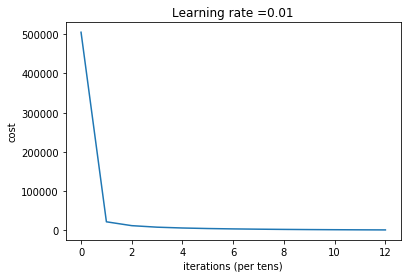

In [57]:
learning_rate = 0.01
plt.plot(np.squeeze(all_costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [58]:
predictions = tf.argmax(pred,1)
correct_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,correct_labels)

In [59]:
test_prediction = sess.run(predictions,feed_dict={x:X_test})
test_correct_label = sess.run(correct_labels,feed_dict={y: Y_test})
test_correct_prediction = sess.run(correct_predictions,feed_dict={x:X_test,y:Y_test})

In [60]:
train_prediction = sess.run(predictions,feed_dict={x:X_train})
train_correct_label = sess.run(correct_labels,feed_dict={y: Y_train})
train_correct_prediction = sess.run(correct_predictions,feed_dict={x:X_train,y:Y_train})

In [61]:
accuracy = (train_correct_prediction.sum()/m_train)*100
print("Accuracy on training data : ", accuracy,"%")

print("----------------------------------------------")

accuracy = (test_correct_prediction.sum()/m_test)*100
print("Accuracy on testing data : ", accuracy,"%")

Accuracy on training data :  97.81833333333333 %
----------------------------------------------
Accuracy on testing data :  93.11 %


In [62]:
test_prediction, test_correct_label, test_correct_prediction

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [63]:
train_prediction, train_correct_label, train_correct_prediction

(array([5, 0, 4, ..., 5, 6, 8], dtype=int64),
 array([5, 0, 4, ..., 5, 6, 8], dtype=int64),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [64]:
print("WEIGHTS :")
print(sess.run(weights))

WEIGHTS :
{'W1': array([[ 0.03939428,  0.6334608 , -0.3893402 , ...,  1.2610946 ,
         0.05878248,  0.5810914 ],
       [ 1.2377503 ,  1.3685098 ,  0.58457655, ..., -0.6251919 ,
         0.5615023 , -0.12846364],
       [ 1.0453949 ,  1.2000985 , -1.1735432 , ...,  0.14756694,
         1.5564629 ,  0.19517605],
       ...,
       [ 0.26114476, -2.3425493 , -0.07114758, ..., -1.429425  ,
         0.09297654,  0.40471804],
       [ 0.579798  ,  1.4801689 , -0.22603875, ...,  2.0532503 ,
        -1.234563  , -1.2508954 ],
       [ 0.4235652 , -0.80528164, -0.82707477, ...,  1.7522966 ,
         0.6494403 , -2.5542576 ]], dtype=float32), 'W2': array([[ 2.215984  , -1.4477366 ,  0.7274149 , ..., -0.09565568,
        -0.36292428, -0.42855647],
       [ 1.4030695 ,  0.85212624,  0.18339461, ..., -0.02152132,
         0.16477814, -0.3400744 ],
       [-1.1107439 , -0.23192228, -0.73752177, ...,  0.48874858,
         0.19851962, -0.7635528 ],
       ...,
       [ 0.61769044,  0.08236349, -2

In [65]:
print("BIASES")
print(sess.run(biases))

BIASES
{'b1': array([-7.22301528e-02,  1.10131299e+00,  9.33825076e-01,  9.79305208e-01,
       -9.14734662e-01, -4.66057003e-01,  1.72013986e+00,  1.42021894e+00,
       -4.46864665e-01,  2.08277442e-03, -1.03066719e+00, -9.43383634e-01,
       -9.72700655e-01,  2.82888085e-01, -1.14330769e+00, -4.53978121e-01,
        1.92482758e+00, -1.32286632e+00,  8.03280890e-01, -1.70669293e+00,
       -1.92206037e+00,  1.16740716e+00,  2.75781035e-01, -1.67665315e+00,
        2.83798426e-01, -4.76792127e-01, -2.00814676e+00, -1.80241239e+00,
        1.07393253e+00, -4.38776042e-04, -1.93805933e+00,  8.47869098e-01,
        8.97023678e-01, -9.73599777e-02, -9.76881921e-01, -8.96281283e-03,
       -1.34597969e+00,  1.28868628e+00, -1.15753323e-01,  8.35816681e-01,
        4.01243746e-01, -5.51909149e-01,  2.21326041e+00, -1.17748892e+00,
        2.40655333e-01, -1.19605017e+00, -4.20268536e-01, -1.44776985e-01,
        2.57484078e-01,  1.28456518e-01,  1.11913502e+00,  1.61198103e+00,
       -2.9